In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime

import xesmf as xe
import scipy.signal as signal
import scipy.stats as st
import xgcm

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import cartopy.crs as ccrs
import cmocean

from glob import glob
import sys
sys.path.append('../')
from utils import *
from load import *
from numerics import *



In [3]:
gridd1 = xr.open_dataset('data/DESALADORAS_RUND1/crocod1_grd.nc').load()

In [4]:
paths   = sorted(glob('data/DESALADORAS_RUND1/*avg*.nc'))[12:]
control = xr.open_mfdataset(paths, parallel=True)
control = center_crocogrid(control, control.keys())
control = fix_crocotime(control, YORIG='1949-12-31 00:00:00')

salt_control = control.salt.load()



In [5]:
paths   = sorted(glob('data/DESALADORAS_RUND1_RIOS/*avg*.nc'))
rivers = xr.open_mfdataset(paths, parallel=True)
rivers = center_crocogrid(rivers, rivers.keys())
rivers = fix_crocotime(rivers, YORIG='1949-12-31 00:00:00')

salt_rivers = rivers.salt.load()



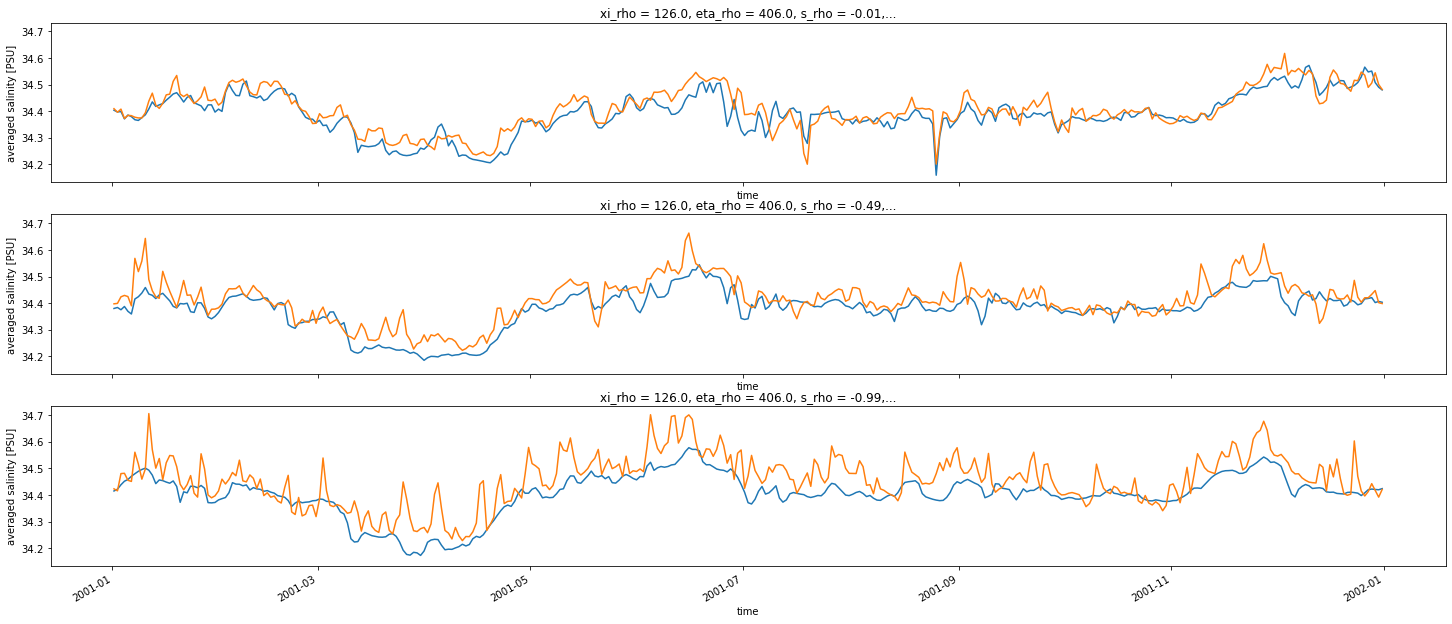

In [6]:
ts_control = control.salt.sel(eta_rho=406, xi_rho=126)
ts_rivers  = rivers.salt.sel(eta_rho=406, xi_rho=126)
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(25,10))
ts_control.isel(s_rho=-1).plot(ax=ax[0])
ts_rivers.isel(s_rho=-1).plot(ax=ax[0])

ts_control.isel(s_rho=25).plot(ax=ax[1])
ts_rivers.isel(s_rho=25).plot(ax=ax[1])

ts_control.isel(s_rho=0).plot(ax=ax[2])
ts_rivers.isel(s_rho=0).plot(ax=ax[2])


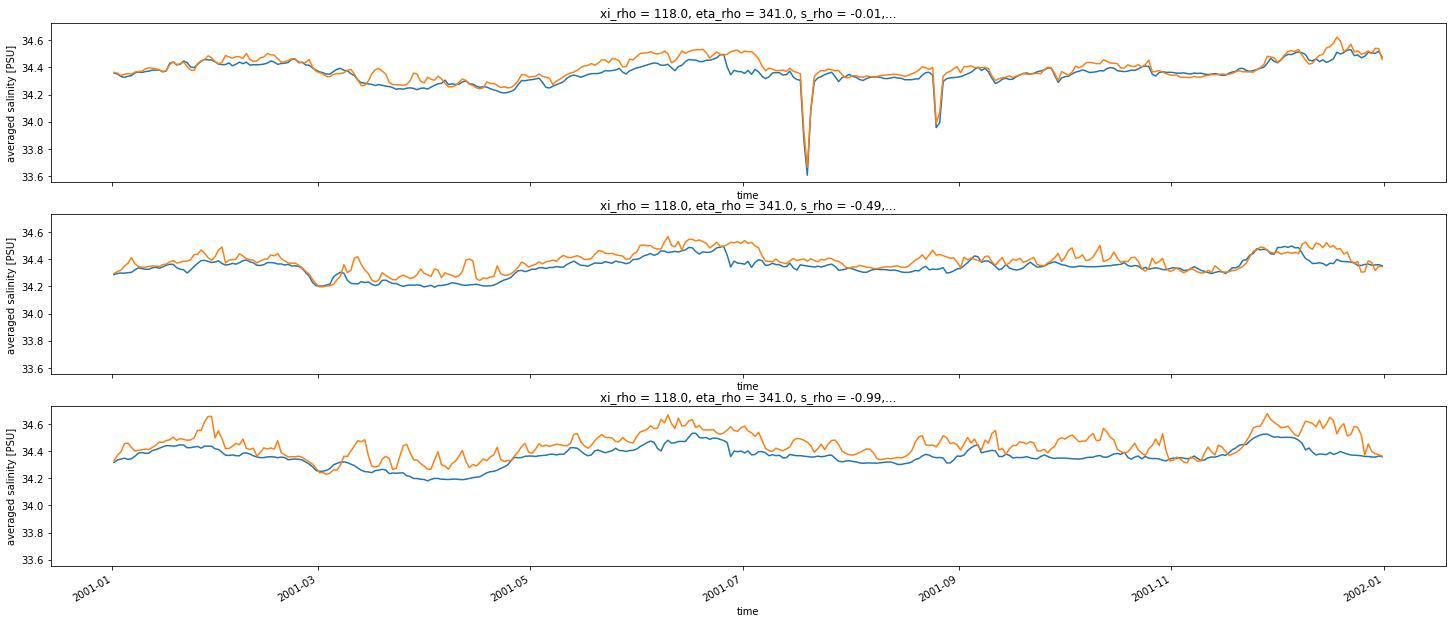

In [7]:
ts_control = control.salt.sel(eta_rho=341, xi_rho=118)
ts_rivers  = rivers.salt.sel(eta_rho=341, xi_rho=118)
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(25,10))
ts_control.isel(s_rho=-1).plot(ax=ax[0])
ts_rivers.isel(s_rho=-1).plot(ax=ax[0])

ts_control.isel(s_rho=25).plot(ax=ax[1])
ts_rivers.isel(s_rho=25).plot(ax=ax[1])

ts_control.isel(s_rho=0).plot(ax=ax[2])
ts_rivers.isel(s_rho=0).plot(ax=ax[2])

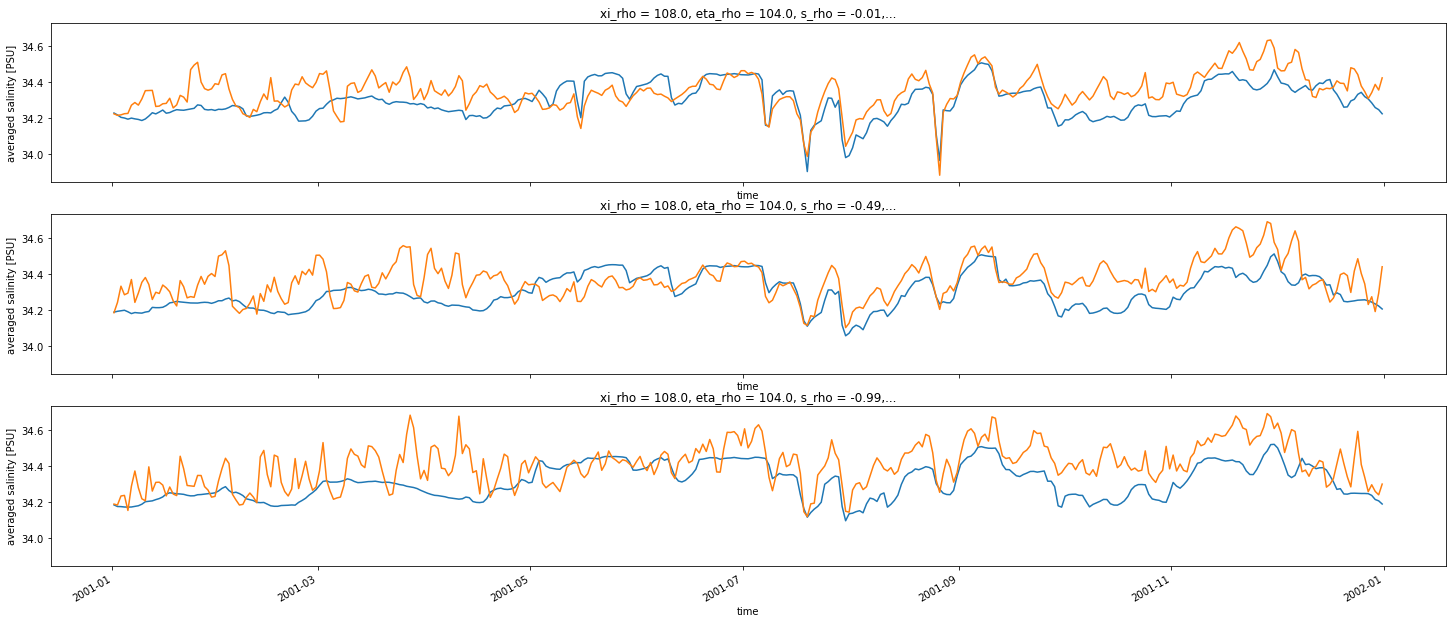

In [8]:
ts_control = control.salt.sel(eta_rho=104, xi_rho=108)
ts_rivers  = rivers.salt.sel(eta_rho=104, xi_rho=108)
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(25,10))
ts_control.isel(s_rho=-1).plot(ax=ax[0])
ts_rivers.isel(s_rho=-1).plot(ax=ax[0])

ts_control.isel(s_rho=25).plot(ax=ax[1])
ts_rivers.isel(s_rho=25).plot(ax=ax[1])

ts_control.isel(s_rho=0).plot(ax=ax[2])
ts_rivers.isel(s_rho=0).plot(ax=ax[2])

(array([ 5., 18., 42., 43., 66., 75., 55., 26., 26.,  9.]),
 array([34.119156, 34.1764  , 34.23364 , 34.290882, 34.34812 , 34.405365,
        34.46261 , 34.519848, 34.57709 , 34.63433 , 34.691574],
       dtype=float32),
 <BarContainer object of 10 artists>)

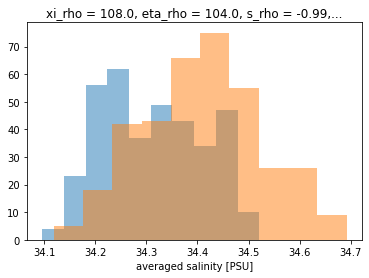

In [21]:
ts_control.isel(s_rho=0).plot.hist(alpha=0.5)
ts_rivers.isel(s_rho=0).plot.hist(alpha=0.5)

In [9]:
bias = (rivers.salt-control.salt).load()

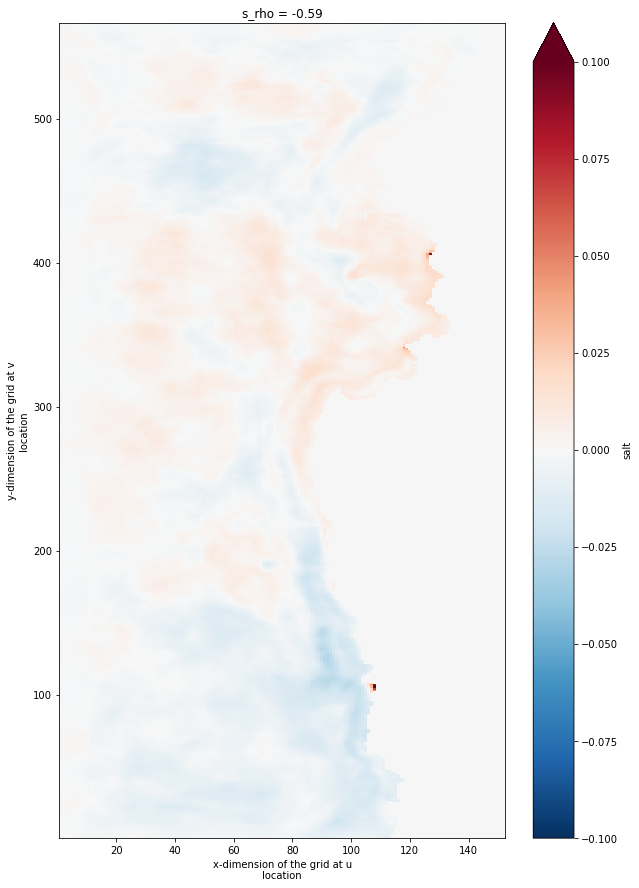

In [25]:
bias.isel(s_rho=20).mean('time').plot(figsize=(10,15), vmin=-0.1, vmax=0.1, cmap='RdBu_r')

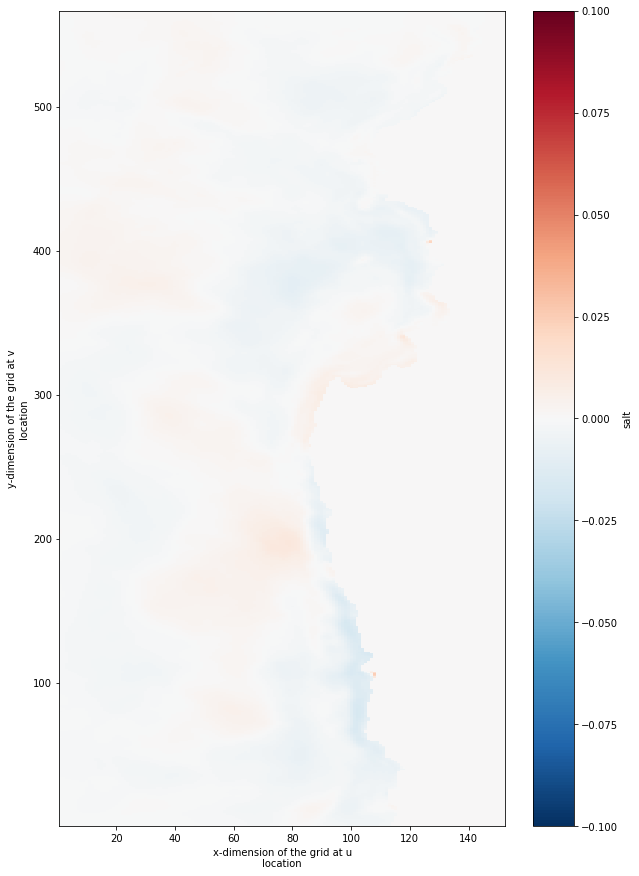

In [16]:
(salt_rivers.std(['s_rho','time'])-salt_control.std(['s_rho','time'])).plot(figsize=(10,15), vmin=-0.1, vmax=0.1, cmap='RdBu_r')